<div style="padding:20px; 
            color: #4b0082;
            margin: 10px auto; 
            font-size:110%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #ff7f50;
            background-color:#ffd700;
            overflow:hidden;
            font-weight:500;
            width: fit-content;"> 
    Problem Statement: Using Dental Metrics to Predict Gender 
</div>


In [1]:
# Importing necessary liabraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# load dataset and see the few datapoints of dataset
df = pd.read_csv("Dentistry Dataset.csv")
df.head(10)

Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0      1        NaN   24  Female                            25.06   
1      2        NaN   22  Female                            25.78   
2      3        NaN   23  Female                            23.83   
3      4        NaN   20  Female                            26.12   
4      5        NaN   20  Female                            26.36   
5      6        NaN   25  Female                            24.40   
6      7        NaN   21  Female                            28.10   
7      8        NaN   18  Female                            24.24   
8      9        NaN   18  Female                            25.95   
9     10        NaN   25  Female                            23.81   

   intercanine distance casts  right canine width intraoral  \
0                       25.05                          6.08   
1                       25.79                          6.13   
2                       23.83                          5.91   
3                       26.12                          6.08   
4                       26.41                          6.09   
5                       24.42                          6.20   
6                       28.12                          6.48   
7                       24.23                          6.15   
8                       25.95                          6.74   
9                       23.81                          6.24   

   right canine width casts  left canine width intraoral  \
0                      6.08                         6.09   
1                      6.13                         6.33   
2                      5.96                         6.28   
3                      6.08                         6.56   
4                      6.09                         6.50   
5                      6.20                         6.23   
6                      6.48                         6.84   
7                      6.15                         6.18   
8                      6.78                         6.74   
9                      6.24                         6.26   

   left canine width casts  right canine index intra oral  \
0                     6.10                          0.242   
1                     6.33                          0.237   
2                     6.28                          0.248   
3                     6.56                          0.232   
4                     6.50                          0.231   
5                     6.23                          0.254   
6                     6.84                          0.230   
7                     6.15                          0.253   
8                     6.74                          0.259   
9                     6.25                          0.262   

   right canine index casts  left canine index intraoral  \
0                     0.242                        0.242   
1                     0.237                        0.247   
2                     0.248                        0.264   
3                     0.232                        0.250   
4                     0.231                        0.246   
5                     0.254                        0.255   
6                     0.230                        0.243   
7                     0.252                        0.254   
8                     0.261                        0.259   
9                     0.262                        0.262   

   left canine index casts  
0                    0.241  
1                    0.247  
2                    0.264  
3                    0.250  
4                    0.246  
5                    0.255  
6                    0.243  
7                    0.253  
8                    0.259  
9                    0.262

In [3]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [4]:
#checking null  
df.isnull().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [5]:
# To check the data type
df.dtypes

Sl No                                int64
Sample ID                          float64
Age                                  int64
Gender                              object
inter canine distance intraoral    float64
intercanine distance casts         float64
right canine width intraoral       float64
right canine width casts           float64
left canine width intraoral        float64
left canine width casts            float64
right canine index intra oral      float64
right canine index casts           float64
left canine index intraoral        float64
left canine index casts            float64
dtype: object

In [6]:
#To check shape of the data (how many of rows and columns)
df.shape

(1100, 14)

In [7]:
# Summary statistics (including categorical)
df.describe(include="all")

Sl No  Sample ID          Age  Gender  \
count   1100.000000        0.0  1100.000000    1100   
unique          NaN        NaN          NaN       2   
top             NaN        NaN          NaN  Female   
freq            NaN        NaN          NaN     550   
mean     550.500000        NaN    21.625455     NaN   
std      317.686953        NaN     2.085892     NaN   
min        1.000000        NaN    18.000000     NaN   
25%      275.750000        NaN    20.000000     NaN   
50%      550.500000        NaN    22.000000     NaN   
75%      825.250000        NaN    23.000000     NaN   
max     1100.000000        NaN    25.000000     NaN   

        inter canine distance intraoral  intercanine distance casts  \
count                       1100.000000                 1100.000000   
unique                              NaN                         NaN   
top                                 NaN                         NaN   
freq                                NaN                         NaN   
mean                          25.989009                   25.880082   
std                            1.315292                    1.862323   
min                           23.120000                    6.540000   
25%                           25.000000                   24.980000   
50%                           25.900000                   25.900000   
75%                           26.992500                   27.000000   
max                           30.310000                   30.310000   

        right canine width intraoral  right canine width casts  \
count                    1100.000000               1100.000000   
unique                           NaN                       NaN   
top                              NaN                       NaN   
freq                             NaN                       NaN   
mean                        6.563000                  6.564491   
std                         0.379035                  0.377553   
min                         5.460000                  5.460000   
25%                         6.290000                  6.300000   
50%                         6.520000                  6.520000   
75%                         6.802500                  6.802500   
max                         7.610000                  7.600000   

        left canine width intraoral  left canine width casts  \
count                   1100.000000              1100.000000   
unique                          NaN                      NaN   
top                             NaN                      NaN   
freq                            NaN                      NaN   
mean                       6.669627                 6.675018   
std                        0.375841                 0.377098   
min                        5.460000                 5.460000   
25%                        6.400000                 6.407500   
50%                        6.660000                 6.680000   
75%                        6.910000                 6.920000   
max                        7.810000                 7.810000   

        right canine index intra oral  right canine index casts  \
count                     1100.000000               1100.000000   
unique                            NaN                       NaN   
top                               NaN                       NaN   
freq                              NaN                       NaN   
mean                         0.253122                  0.252355   
std                          0.015344                  0.012892   
min                          0.223000                  0.223000   
25%                          0.242000                  0.242000   
50%                          0.253000                  0.253000   
75%                          0.262000                  0.261250   
max                          0.363000                  0.302000   

        left canine index intraoral  left canine index casts  
count                   1100.000000              1100.000000  
unique 

In [8]:
#Descriptive statistics (without categorical)
df.describe()

Sl No  Sample ID          Age  inter canine distance intraoral  \
count  1100.000000        0.0  1100.000000                      1100.000000   
mean    550.500000        NaN    21.625455                        25.989009   
std     317.686953        NaN     2.085892                         1.315292   
min       1.000000        NaN    18.000000                        23.120000   
25%     275.750000        NaN    20.000000                        25.000000   
50%     550.500000        NaN    22.000000                        25.900000   
75%     825.250000        NaN    23.000000                        26.992500   
max    1100.000000        NaN    25.000000                        30.310000   

       intercanine distance casts  right canine width intraoral  \
count                 1100.000000                   1100.000000   
mean                    25.880082                      6.563000   
std                      1.862323                      0.379035   
min                      6.540000                      5.460000   
25%                     24.980000                      6.290000   
50%                     25.900000                      6.520000   
75%                     27.000000                      6.802500   
max                     30.310000                      7.610000   

       right canine width casts  left canine width intraoral  \
count               1100.000000                  1100.000000   
mean                   6.564491                     6.669627   
std                    0.377553                     0.375841   
min                    5.460000                     5.460000   
25%                    6.300000                     6.400000   
50%                    6.520000                     6.660000   
75%                    6.802500                     6.910000   
max                    7.600000                     7.810000   

       left canine width casts  right canine index intra oral  \
count              1100.000000                    1100.000000   
mean                  6.675018                       0.253122   
std                   0.377098                       0.015344   
min                   5.460000                       0.223000   
25%                   6.407500                       0.242000   
50%                   6.680000                       0.253000   
75%                   6.920000                       0.262000   
max                   7.810000                       0.363000   

       right canine index casts  left canine index intraoral  \
count               1100.000000                  1100.000000   
mean                   0.252355                     0.256453   
std                    0.012892                     0.012355   
min                    0.223000                     0.223000   
25%                    0.242000                     0.247000   
50%                    0.253000                     0.255000   
75%                    0.261250                     0.264250   
max                    0.302000                     0.305000   

       left canine index casts  
count              1100.000000  
mean                  0.256361  
std                   0.012374  
min                   0.223000  
25%                   0.247000  
50%                   0.255000  
75%                   0.264000  
max                   0.304000

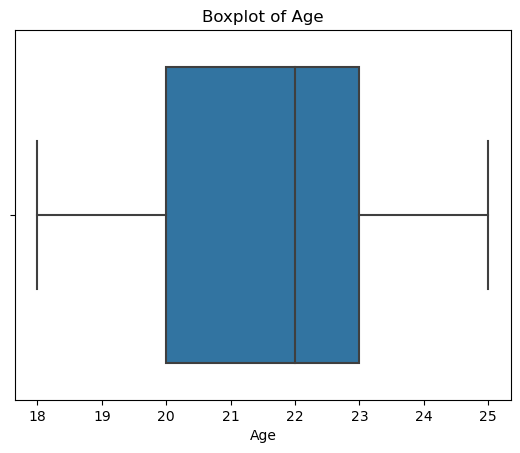

Mean of Age is : 21.625454545454545
Minimum of Age is : 18
Maximum of Age is : 25


In [9]:
# Boxplot of Age
sns.boxplot(x="Age",data=df)
plt.title("Boxplot of Age")
plt.show()
AGE = df['Age']
def All():
    a = AGE.mean()
    print(f'Mean of Age is : {a}')
    b = AGE.min()
    print(f'Minimum of Age is : {b}')
    c = AGE.max()
    print(f'Maximum of Age is : {c}')
All()

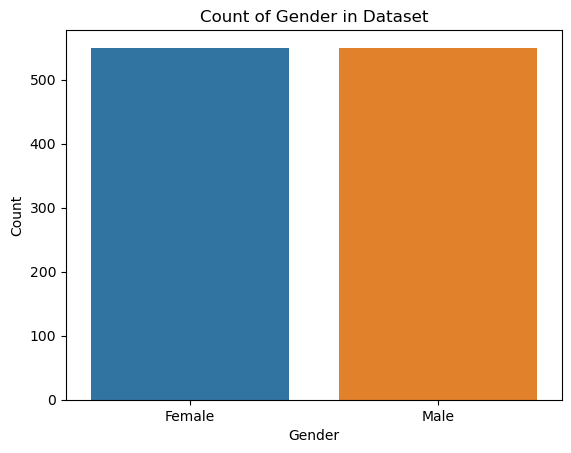

In [10]:
# Countplot for checking how many males and females
sns.countplot(x='Gender', data=df)
plt.title('Count of Gender in Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [11]:
# check the columns from the dataset
df.columns

Index(['Sl No', 'Sample ID', 'Age', 'Gender',
       'inter canine distance intraoral', 'intercanine distance casts',
       'right canine width intraoral', 'right canine width casts',
       'left canine width intraoral', 'left canine width casts',
       'right canine index intra oral', 'right canine index casts',
       'left canine index intraoral', 'left canine index casts'],
      dtype='object')

In [12]:
#For classification prediction sample ID has lots of missing values and Sl No column is not relevant for prediction
df.drop(columns=['Sample ID','Sl No'],axis=1,inplace=True)

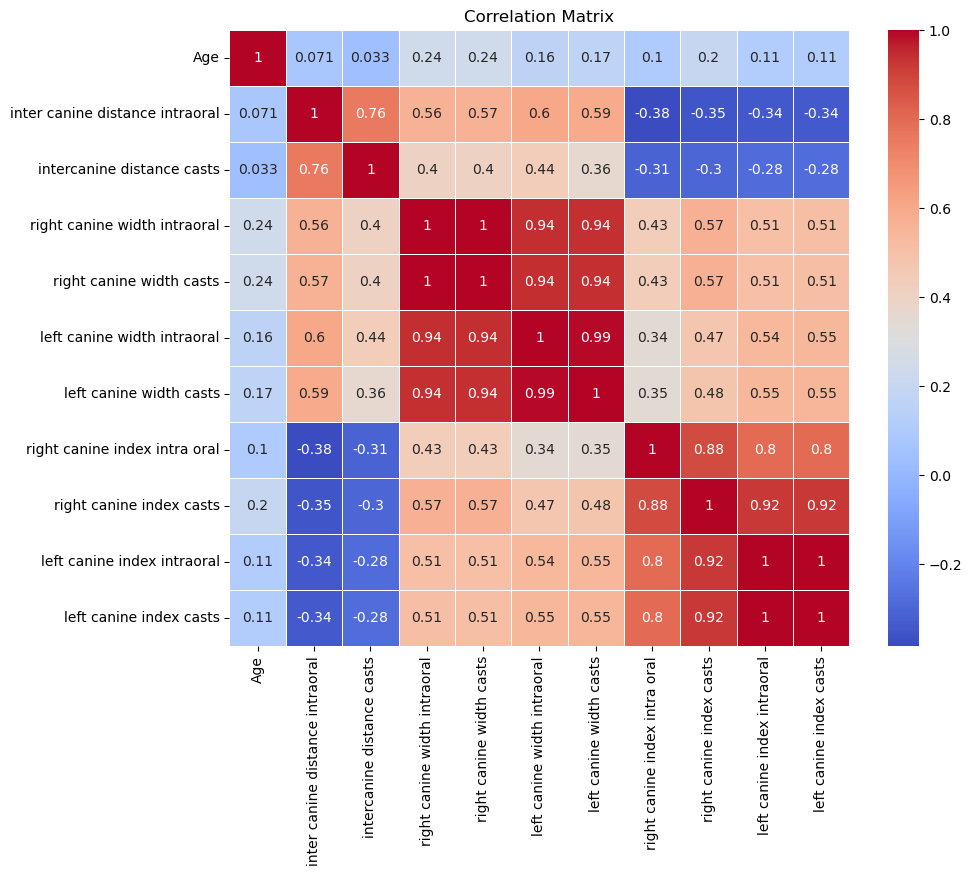

In [13]:
#Correlation Matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
# mean_max_min
mean_icdi = df['inter canine distance intraoral'].mean()
max_icdi = df['inter canine distance intraoral'].max()
min_icdi = df['inter canine distance intraoral'].min()
print(f'Mean of inter canine distance intraoral is : {mean_icdi}')
print(f'Maximum of inter canine distance intraoral is : {max_icdi}')
print(f'Minimum of inter canine distance intraoral is : {min_icdi}')

Mean of inter canine distance intraoral is : 25.989009090909093
Maximum of inter canine distance intraoral is : 30.31
Minimum of inter canine distance intraoral is : 23.12


In [15]:
# mean_max_min
mean_idc = df['intercanine distance casts'].mean()
max_idc = df['intercanine distance casts'].max()
min_idc = df['intercanine distance casts'].min()
print(f'Mean of intercanine distance casts is : {mean_idc}')
print(f'Maximum of intercanine distance casts is : {max_idc}')
print(f'Min of intercanine distance casts is : {min_idc}')

Mean of intercanine distance casts is : 25.880081818181818
Maximum of intercanine distance casts is : 30.31
Min of intercanine distance casts is : 6.54


In [16]:
# mean_max_min
mean_rcwi = df['right canine width intraoral'].mean()
max_rcwi = df['right canine width intraoral'].max()
min_rcwi = df['right canine width intraoral'].min()
print(f'Mean of right canine width intraoral is : {mean_rcwi}')
print(f'Maximum of right canine width intraoral is : {max_rcwi}')
print(f'Min of right canine width intraoral is : {min_rcwi}')

Mean of right canine width intraoral is : 6.563
Maximum of right canine width intraoral is : 7.61
Min of right canine width intraoral is : 5.46


In [17]:
# mean_max_min
mean_rcwc = df['right canine width casts'].mean()
max_rcwc = df['right canine width casts'].max()
min_rcwc = df['right canine width casts'].min()
print(f'Mean of right cannie width casts is : {mean_rcwc}')
print(f'Maximum of right cannie width casts is : {max_rcwc}')
print(f'Min of right cannie width casts is : {min_rcwc}')

Mean of right cannie width casts is : 6.564490909090909
Maximum of right cannie width casts is : 7.6
Min of right cannie width casts is : 5.46


In [18]:
# mean_max_min
mean_lcwi = df['left canine width intraoral'].mean()
max_lcwi = df['left canine width intraoral'].max()
min_lcwi = df['left canine width intraoral'].min()
print(f'Mean of left canine width intraoral is : {mean_lcwi}')
print(f'Maximum of left canine width intraoral is : {max_lcwi}')
print(f'Min of left canine width intraoral is : {min_lcwi}')

Mean of left canine width intraoral is : 6.669627272727273
Maximum of left canine width intraoral is : 7.81
Min of left canine width intraoral is : 5.46


In [19]:
# mean_max_min
mean_lcwc = df['left canine width casts'].mean()
max_lcwc = df['left canine width casts'].max()
min_lcwc = df['left canine width casts'].min()
print(f'Mean of left canine width casts is : {mean_lcwc}')
print(f'Maximum of left canine width casts is : {max_lcwc}')
print(f'Minimum of left canine width casts is : {min_lcwc}')

Mean of left canine width casts is : 6.6750181818181815
Maximum of left canine width casts is : 7.81
Minimum of left canine width casts is : 5.46


In [20]:
# mean_max_min
mean_rcii = df['right canine index intra oral'].mean()
max_rcii = df['right canine index intra oral'].max()
min_rcii = df['right canine index intra oral'].min()
print(f'Mean of right canine index intra oral is : {mean_rcii}')
print(f'Maximum of right canine index intra oral is : {max_rcii}')
print(f'Minimum of right canine index intra oral is : {min_rcii}')

Mean of right canine index intra oral is : 0.2531218181818182
Maximum of right canine index intra oral is : 0.363
Minimum of right canine index intra oral is : 0.223


In [21]:
# mean_max_min
rcic = df['right canine index casts']
def All():
    a = rcic.mean()
    print(f'Mean of right canine index casts : {a}')
    b = rcic.min()
    print(f'Minimum of right canine index casts : {b}')
    c = rcic.max()
    print(f'Maximum of right canine index casts : {c}')
All()

Mean of right canine index casts : 0.2523545454545455
Minimum of right canine index casts : 0.223
Maximum of right canine index casts : 0.302


In [22]:
# left canine index intraoral of mean_max_min
lcii = df['left canine index intraoral']
def All():
    a = lcii.mean()
    print(f'Mean of left canine index intraoral is : {a}')
    b = lcii.min()
    print(f'Minimum of left canine index intraoral is : {b}')
    c = lcii.max()
    print(f'Maximum of left canine index intraoral is : {c}')
All()

Mean of left canine index intraoral is : 0.2564527272727273
Minimum of left canine index intraoral is : 0.223
Maximum of left canine index intraoral is : 0.305


In [23]:
# mean_max_min
lcic=df['left canine index casts']
def All():
    a = lcic.mean()
    print(f'Mean of left canine index casts is : {a}')
    b = lcic.min()
    print(f'Minimum of left canine index casts is : {b}')
    c = lcic.max()
    print(f'Maximum of left canine index casts is : {c}')
All()

Mean of left canine index casts is : 0.2563609090909091
Minimum of left canine index casts is : 0.223
Maximum of left canine index casts is : 0.304


In [24]:
# Checking null values from dataset
df.isnull().sum()

Age                                0
Gender                             0
inter canine distance intraoral    0
intercanine distance casts         0
right canine width intraoral       0
right canine width casts           0
left canine width intraoral        0
left canine width casts            0
right canine index intra oral      0
right canine index casts           0
left canine index intraoral        0
left canine index casts            0
dtype: int64

In [25]:
#Data is balanced equal no of count male and female
fig = px.histogram(df, x="Gender", color="Gender", barmode="group")
fig.show()

In [26]:
# To check the data types
df.dtypes

Age                                  int64
Gender                              object
inter canine distance intraoral    float64
intercanine distance casts         float64
right canine width intraoral       float64
right canine width casts           float64
left canine width intraoral        float64
left canine width casts            float64
right canine index intra oral      float64
right canine index casts           float64
left canine index intraoral        float64
left canine index casts            float64
dtype: object

In [27]:
# To see the 10 samplepoint from dataset 
df.sample(10)

Age  Gender  inter canine distance intraoral  \
90     22    Male                            24.86   
638    22    Male                            27.40   
971    21    Male                            27.70   
660    22    Male                            27.86   
608    20    Male                            27.33   
827    25    Male                            27.09   
1097   25    Male                            24.24   
901    19    Male                            25.74   
181    18  Female                            25.08   
596    23  Female                            24.84   

      intercanine distance casts  right canine width intraoral  \
90                          6.54                          6.54   
638                        27.40                          6.47   
971                        27.70                          7.08   
660                        27.89                          6.83   
608                        27.32                          6.32   
827                        27.09                          7.06   
1097                       24.24                          6.60   
901                        25.74                          6.80   
181                        25.10                          5.84   
596                        24.84                          6.25   

      right canine width casts  left canine width intraoral  \
90                        6.54                         6.54   
638                       6.47                         6.57   
971                       7.08                         7.08   
660                       6.83                         6.92   
608                       6.34                         6.67   
827                       7.06                         7.08   
1097                      6.60                         6.61   
901                       6.80                         6.80   
181                       5.83                         6.08   
596                       6.25                         6.25   

      left canine width casts  right canine index intra oral  \
90                       7.14                          0.263   
638                      6.58                          0.236   
971                      7.07                          0.255   
660                      6.91                          0.245   
608                      6.68                          0.231   
827                      7.08                          0.261   
1097                     6.61                          0.272   
901                      6.80                          0.263   
181                      6.08                          0.232   
596                      6.25                          0.252   

      right canine index casts  left canine index intraoral  \
90                       0.263                        0.263   
638                      0.236                        0.240   
971                      0.255                        0.255   
660                      0.245                        0.248   
608                      0.231                        0.244   
827                      0.261                        0.261   
1097                     0.272                        0.272   
901                      0.263                        0.263   
181                      0.232                        0.242   
596                      0.252                        0.252   

      left canine index casts  
90                      0.263  
638                     0.240  
971                     0.255  
660                     0.247  
608                     0.244  
827                     0.261  
1097                    0.272  
901                     0.263  
181                     0.242  
596                     0.252

In [28]:
# Label encoding liabrary
from sklearn.preprocessing import LabelEncoder
#  Encode the 'Gender' column (categorical variable)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Check the transformation (0 = Female, 1 = Male)
df[['Gender']].head()

Gender
0       0
1       0
2       0
3       0
4       0

In [29]:
# Split the dataset into independent (X) and dependent (y) variables
# Independent variables 
X = df.drop(columns=['Gender'])

# Dependent variable (Gender)
y = df['Gender']

In [30]:
# for normalizer import normalizer liabrary
from sklearn.preprocessing import Normalizer
# fit normalizer with data
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

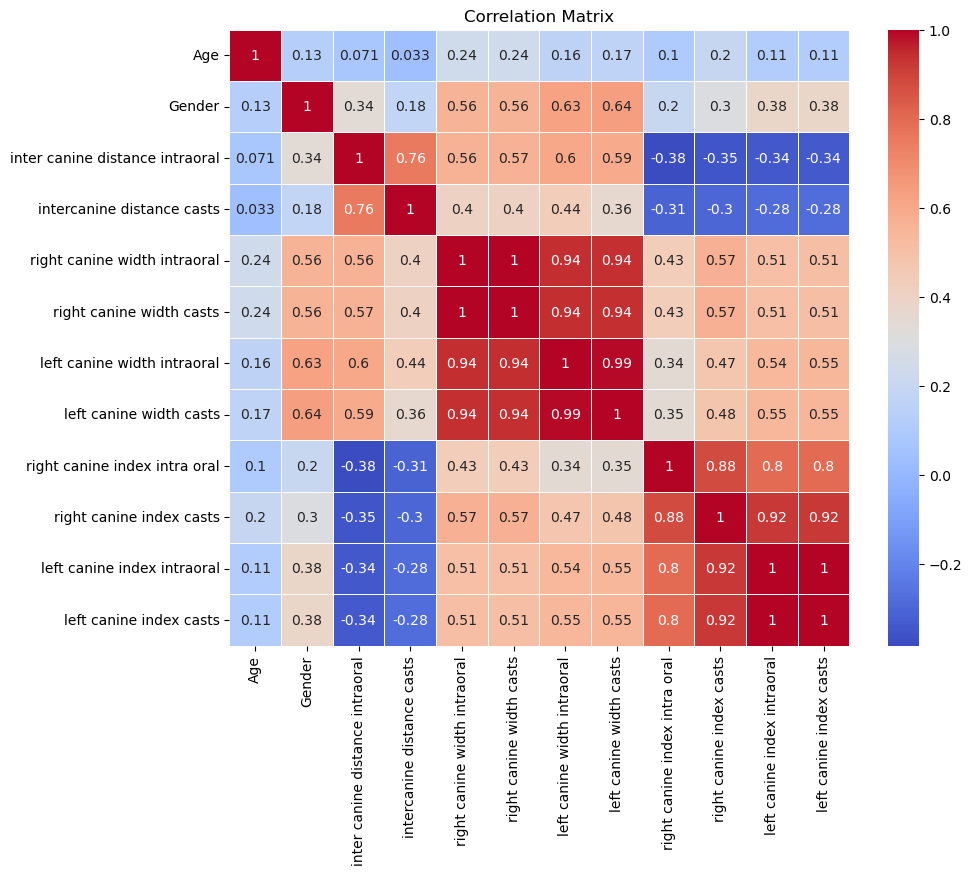

In [31]:
#Correlation Matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

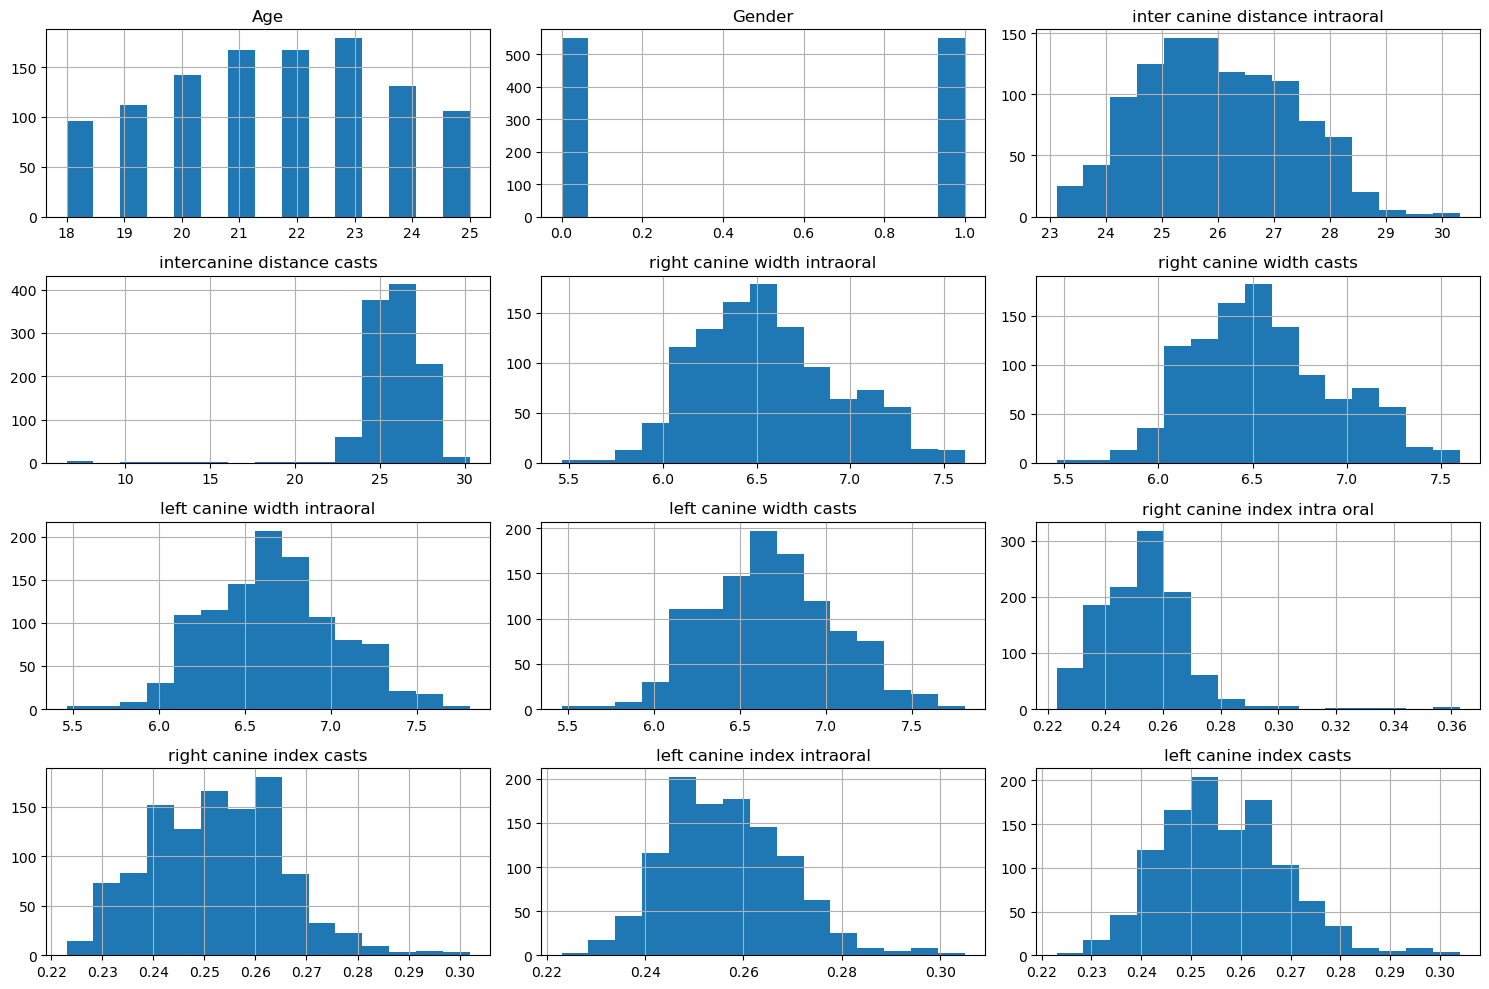

In [32]:
#histogram
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [33]:
# Import necessary libraries for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier

# Train and test data (0.7,0.3)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [34]:
# Initialize the models
lr = LogisticRegression(C=1.0, penalty='l2')
dt = DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5)
rf = RandomForestClassifier(max_depth=10, n_estimators=100, min_samples_split=10)
xgb = XGBClassifier(max_depth=7, learning_rate=0.1, n_estimators=100)

In [35]:
# Models fitting
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
# Make predictions on the test set
y_pred_log_reg = lr.predict(X_test)
y_pred_dec_tree = dt.predict(X_test)
y_pred_rand_forest = rf.predict(X_test)
y_pred_Xgb = xgb.predict(X_test)

# Evaluate the models using accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
accuracy_rand_forest = accuracy_score(y_test, y_pred_rand_forest)
accuracy_xgb = accuracy_score(y_test,y_pred_Xgb)

print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")
print(f"Decision Tree Accuracy: {accuracy_dec_tree:.2f}")
print(f"Random Forest Accuracy: {accuracy_rand_forest:.2f}")
print(f"XGB Boost Classifier Accuracy: {accuracy_xgb:.2f}")

Logistic Regression Accuracy: 0.65
Decision Tree Accuracy: 0.81
Random Forest Accuracy: 0.86
XGB Boost Classifier Accuracy: 0.86


In [37]:
# Confusion matrices for each model
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_log_reg))

print("\nConfusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dec_tree))

print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rand_forest))

print("\nConfusion Matrix (XGB Boost):")
print(confusion_matrix(y_test,y_pred_Xgb))

Confusion Matrix (Logistic Regression):
[[ 77  92]
 [ 23 138]]

Confusion Matrix (Decision Tree):
[[133  36]
 [ 26 135]]

Confusion Matrix (Random Forest):
[[146  23]
 [ 22 139]]

Confusion Matrix (XGB Boost):
[[146  23]
 [ 22 139]]


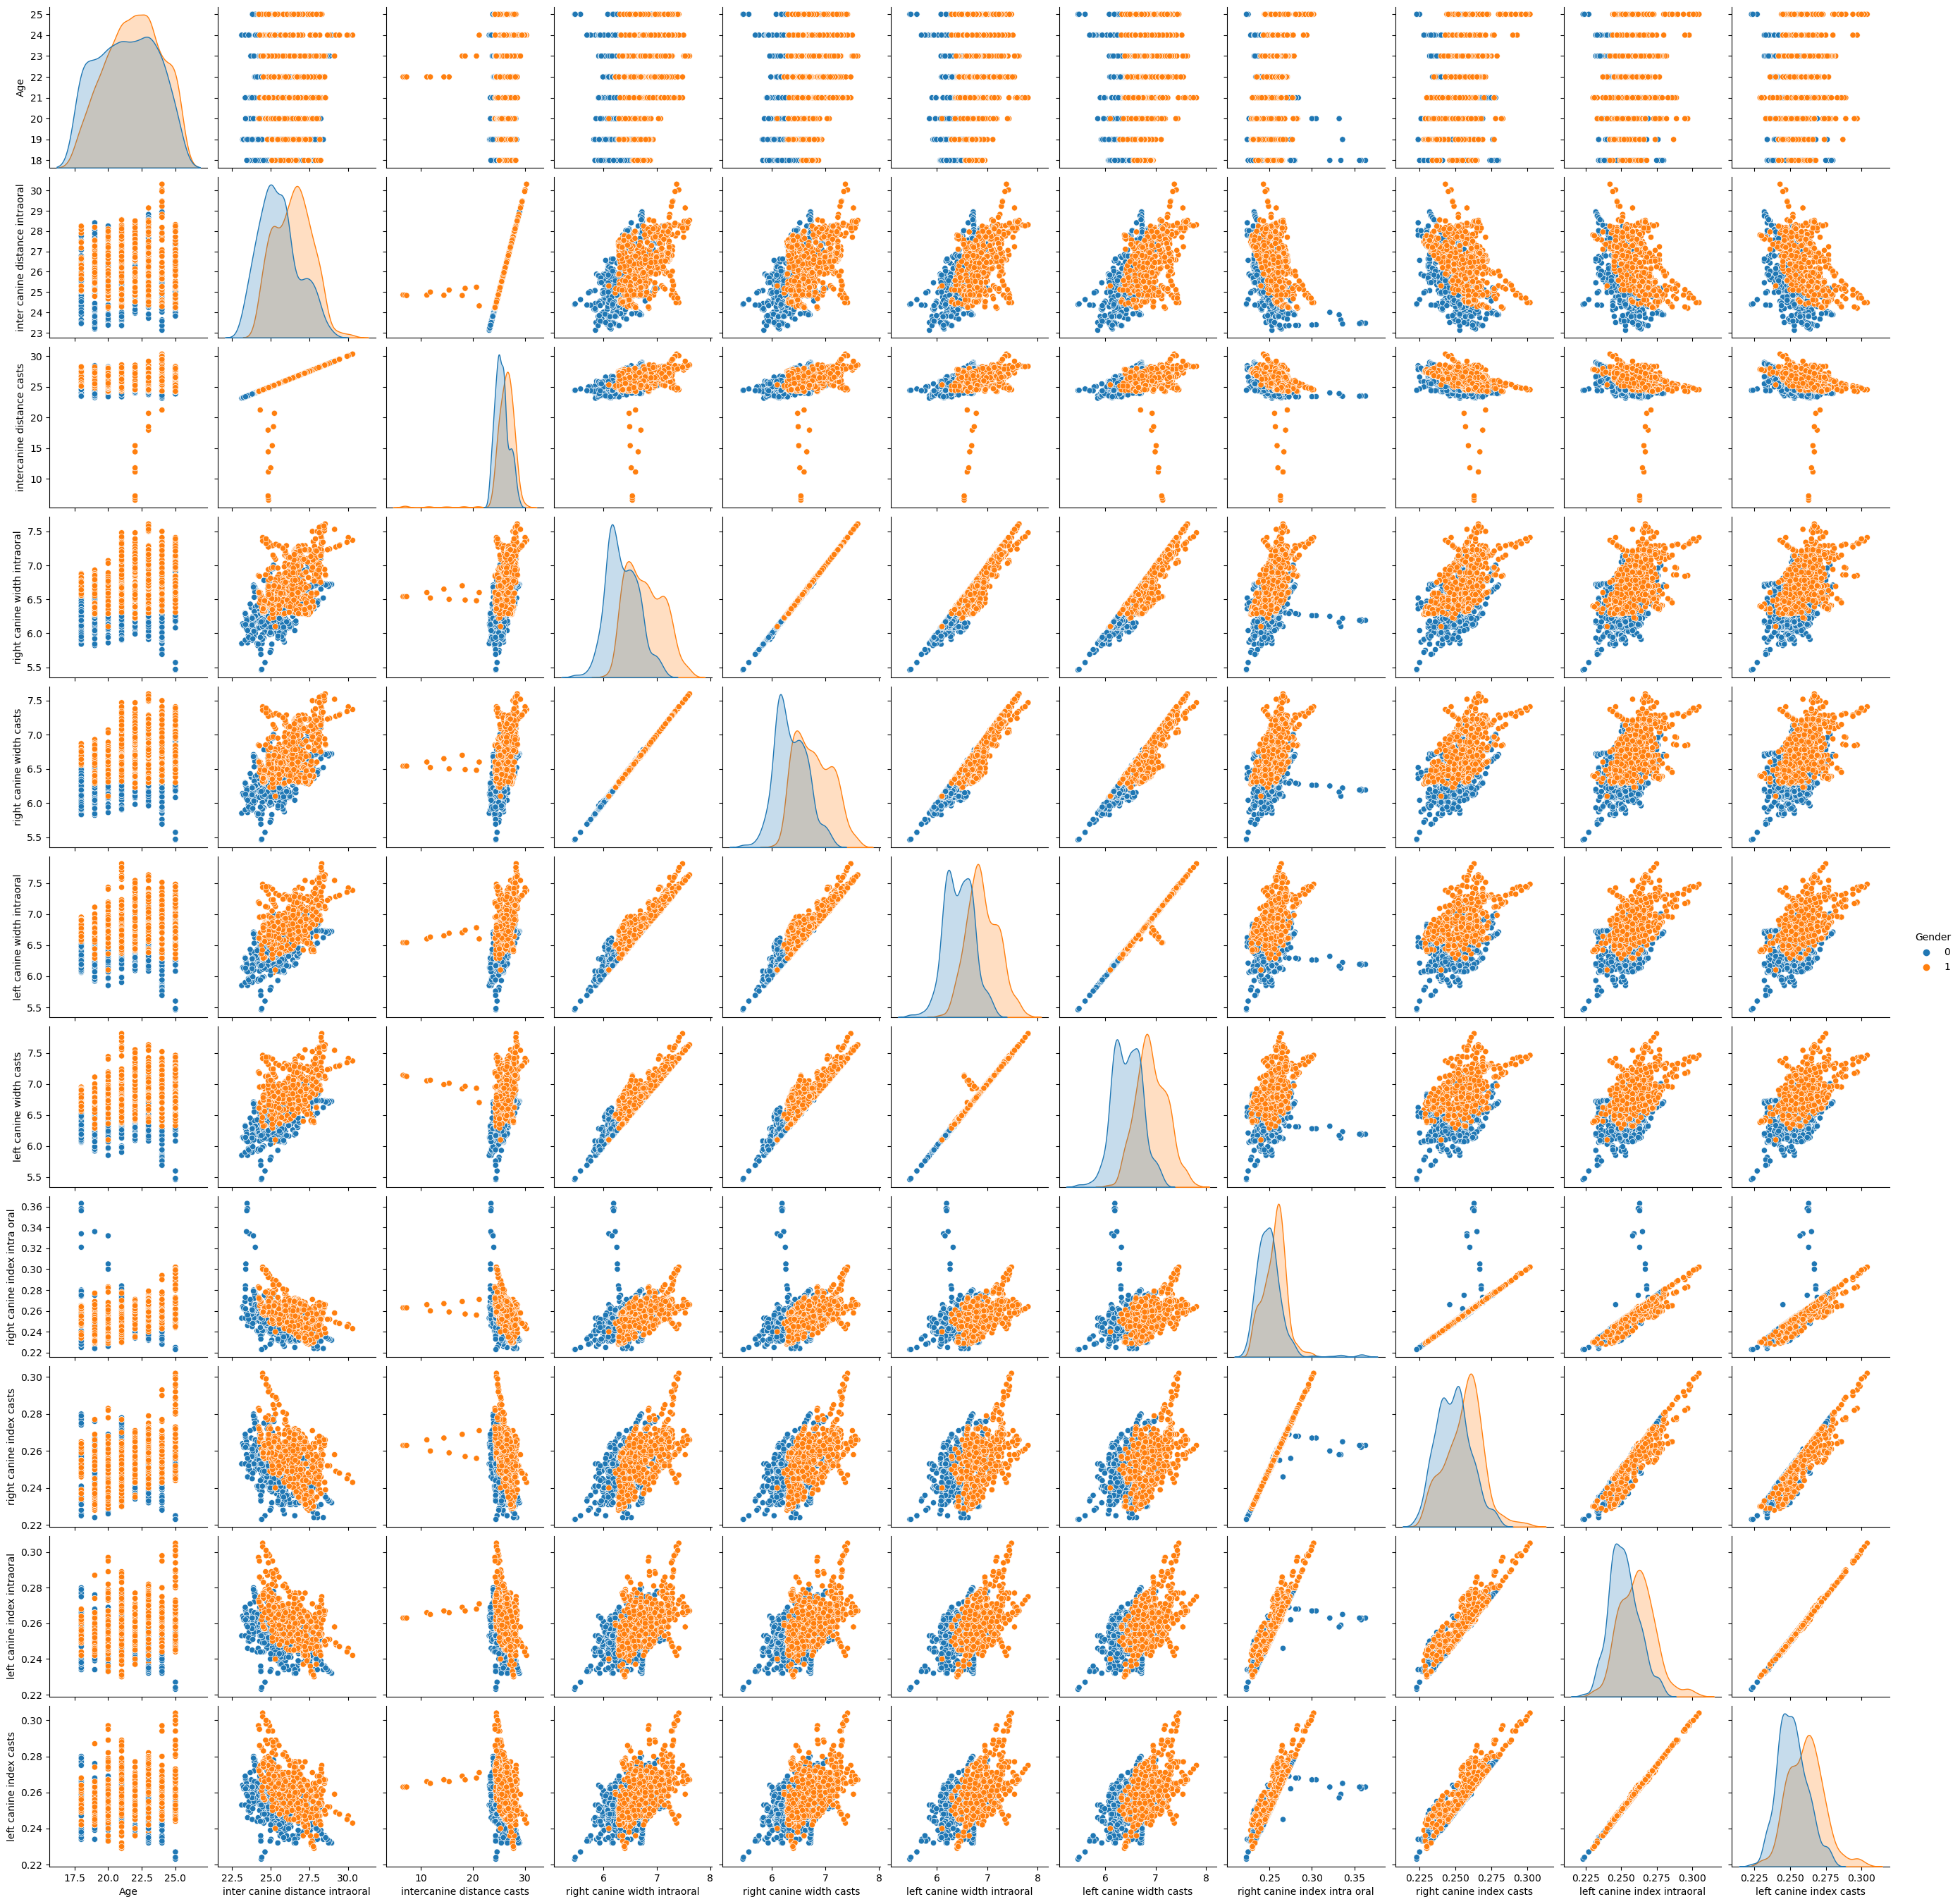

In [38]:
#pairplot
sns.pairplot(df,hue="Gender")
plt.show()

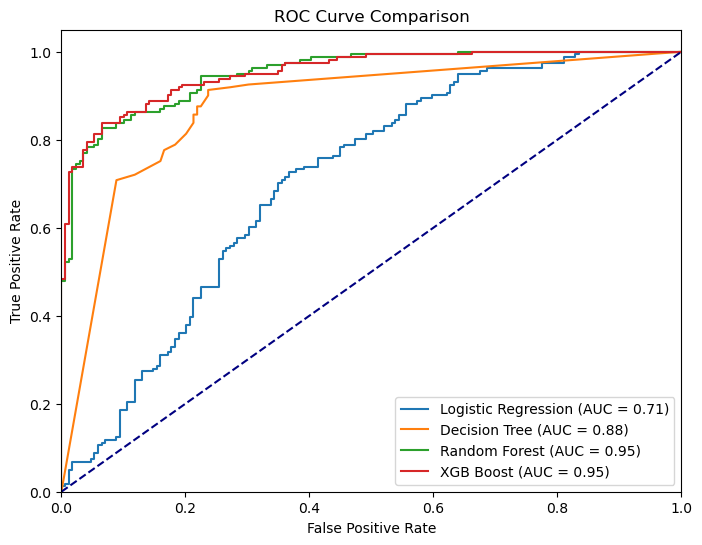

In [39]:
from sklearn.metrics import roc_curve, auc

#  Model evaluation using ROC curve and AUC score

# Logistic Regression ROC curve and AUC
y_prob_log_reg = lr.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Decision Tree ROC curve and AUC
y_prob_dec_tree = dt.predict_proba(X_test)[:, 1]
fpr_dec_tree, tpr_dec_tree, _ = roc_curve(y_test, y_prob_dec_tree)
roc_auc_dec_tree = auc(fpr_dec_tree, tpr_dec_tree)

# Random Forest ROC curve and AUC
y_prob_rand_forest = rf.predict_proba(X_test)[:, 1]
fpr_rand_forest, tpr_rand_forest, _ = roc_curve(y_test, y_prob_rand_forest)
roc_auc_rand_forest = auc(fpr_rand_forest, tpr_rand_forest)

# XGB boost ROC curve and AUC
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_rxgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb )
roc_auc_xgb = auc(fpr_rxgb, tpr_xgb)

# Plot ROC Curves for all models
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_dec_tree, tpr_dec_tree, label=f'Decision Tree (AUC = {roc_auc_dec_tree:.2f})')
plt.plot(fpr_rand_forest, tpr_rand_forest, label=f'Random Forest (AUC = {roc_auc_rand_forest:.2f})')
plt.plot(fpr_rxgb, tpr_xgb, label=f'XGB Boost (AUC = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

In [40]:
# Showing AUC values
print(f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
print(f'Decision Tree (AUC = {roc_auc_dec_tree:.2f})')
print(f'Random Forest (AUC = {roc_auc_rand_forest:.2f})')
print(rf'XGB Boost (AUC = {roc_auc_xgb:.2f})')

Logistic Regression (AUC = 0.71)
Decision Tree (AUC = 0.88)
Random Forest (AUC = 0.95)
XGB Boost (AUC = 0.95)


In [41]:
# Cross validation for to avoid overfitting 
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f'Logistic Regression CV Scores: {lr_scores.mean()}')
dt_scores = cross_val_score(dt, X_train, y_train, cv=5)
print(f'Decision Tree CV Scores: {dt_scores.mean()}')
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f'Random Forest CV Scores: {rf_scores.mean()}')
xgb_scores = cross_val_score(xgb, X_train, y_train, cv=5)
print(f'XGBoost CV Scores: {xgb_scores.mean()}')

Logistic Regression CV Scores: 0.5844155844155845
Decision Tree CV Scores: 0.8207792207792208
Random Forest CV Scores: 0.8792207792207792
XGBoost CV Scores: 0.887012987012987
